In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
!pip install xgboost lightgbm catboost scikit-learn tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
df = pd.read_csv('accident report.csv')

# Displaying the first few rows of the dataset
print("Dataset Head:")
display(df.head())



Dataset Head:


,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0


In [ ]:
# Checking for missing values and data types
print("\nDataset Info:")
df.info()




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   summary_nr            4847 non-null   int64 
 1   Event Date            4847 non-null   object
 2   Abstract Text         4847 non-null   object
 3   Event Description     4847 non-null   object
 4   Event Keywords        4847 non-null   object
 5   con_end               4847 non-null   object
 6   Construction End Use  4847 non-null   object
 7   build_stor            4847 non-null   int64 
 8   Building Stories      4847 non-null   object
 9   proj_cost             4847 non-null   object
 10  Project Cost          4847 non-null   object
 11  proj_type             4847 non-null   object
 12  Project Type          4847 non-null   object
 13  Degree of Injury      4847 non-null   object
 14  nature_of_inj         4847 non-null   int64 
 15  Nature of Injury      4

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [ ]:
a="con_end	build_stor proj_cost proj_type nature_of_inj part_of_body event_type evn_factor	hum_factor task_assigned"
a=a.split()
print(a)

['con_end', 'build_stor', 'proj_cost', 'proj_type', 'nature_of_inj', 'part_of_body', 'event_type', 'evn_factor', 'hum_factor', 'task_assigned']


In [ ]:

# Checking basic statistics
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,summary_nr,build_stor,nature_of_inj,part_of_body,event_type,evn_factor,hum_factor,task_assigned,fat_cause,fall_ht
count,4.847000e+03,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.0
mean,2.208956e+08,0.447287,11.852486,13.629255,5.193728,11.983701,9.456984,1.371157,3.065608,0.0
std,5.585438e+04,3.011749,7.634332,7.838927,4.608330,6.198560,6.161380,0.483164,7.247627,0.0
min,2.207779e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,2.208494e+08,0.000000,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.0
50%,2.209189e+08,0.000000,12.000000,13.000000,5.000000,13.000000,13.000000,1.000000,0.000000,0.0
75%,2.209406e+08,0.000000,21.000000,19.000000,6.000000,18.000000,14.000000,2.000000,0.000000,0.0
max,2.209923e+08,139.000000,22.000000,31.000000,14.000000,18.000000,20.000000,2.000000,30.000000,0.0


In [ ]:
columns_to_drop = ['summary_nr', 'Abstract Text','Event Description','Event Keywords','Building Stories',"fall_ht","hazsub",'con_end', 'proj_cost', 'proj_type', 'nature_of_inj', 'part_of_body', 'event_type', 'evn_factor', 'hum_factor', 'task_assigned']  # Specify columns to remove
df = df.drop(columns=columns_to_drop)

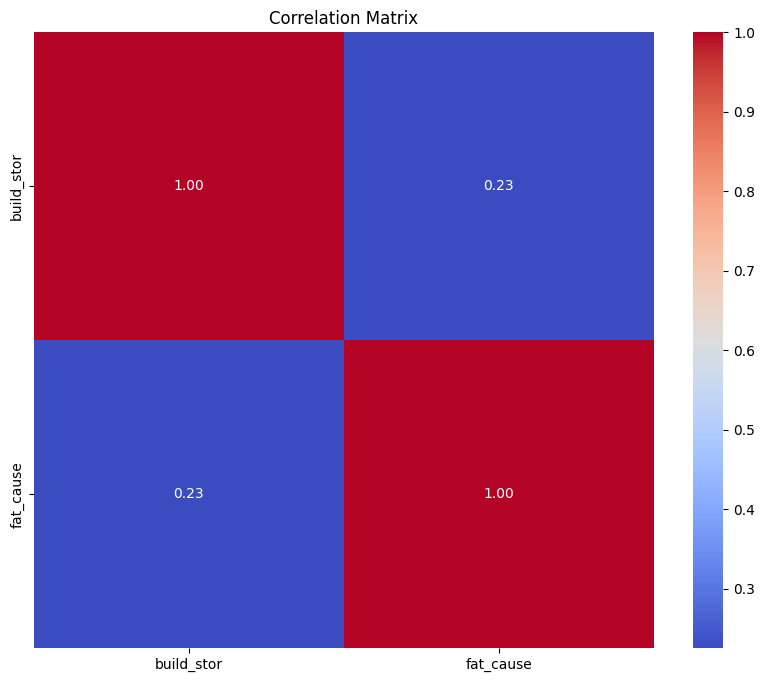

In [ ]:
# Correlation matrix and heatmap
# Include numeric_only=True to only calculate correlation for numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Assuming df is your DataFrame, and you want to select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

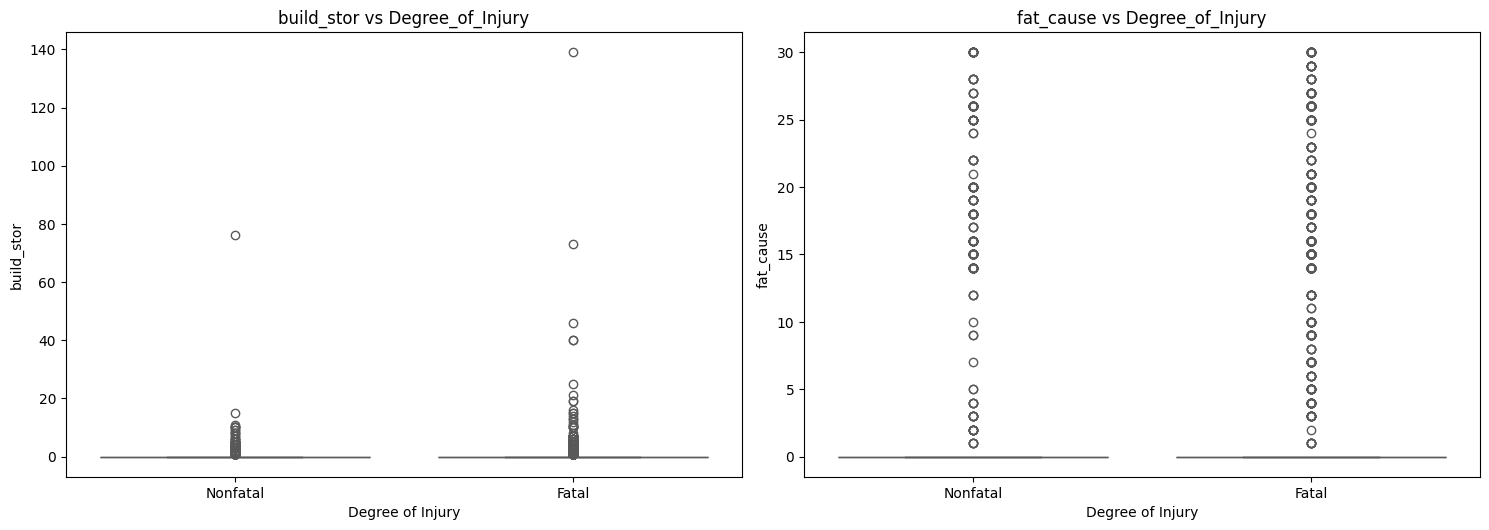

In [ ]:
# Boxplots to examine the relationship between numerical features and target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df['Degree of Injury'], y=df[col], palette='Set2')
    plt.title(f'{col} vs Degree_of_Injury')
plt.tight_layout()
plt.show()




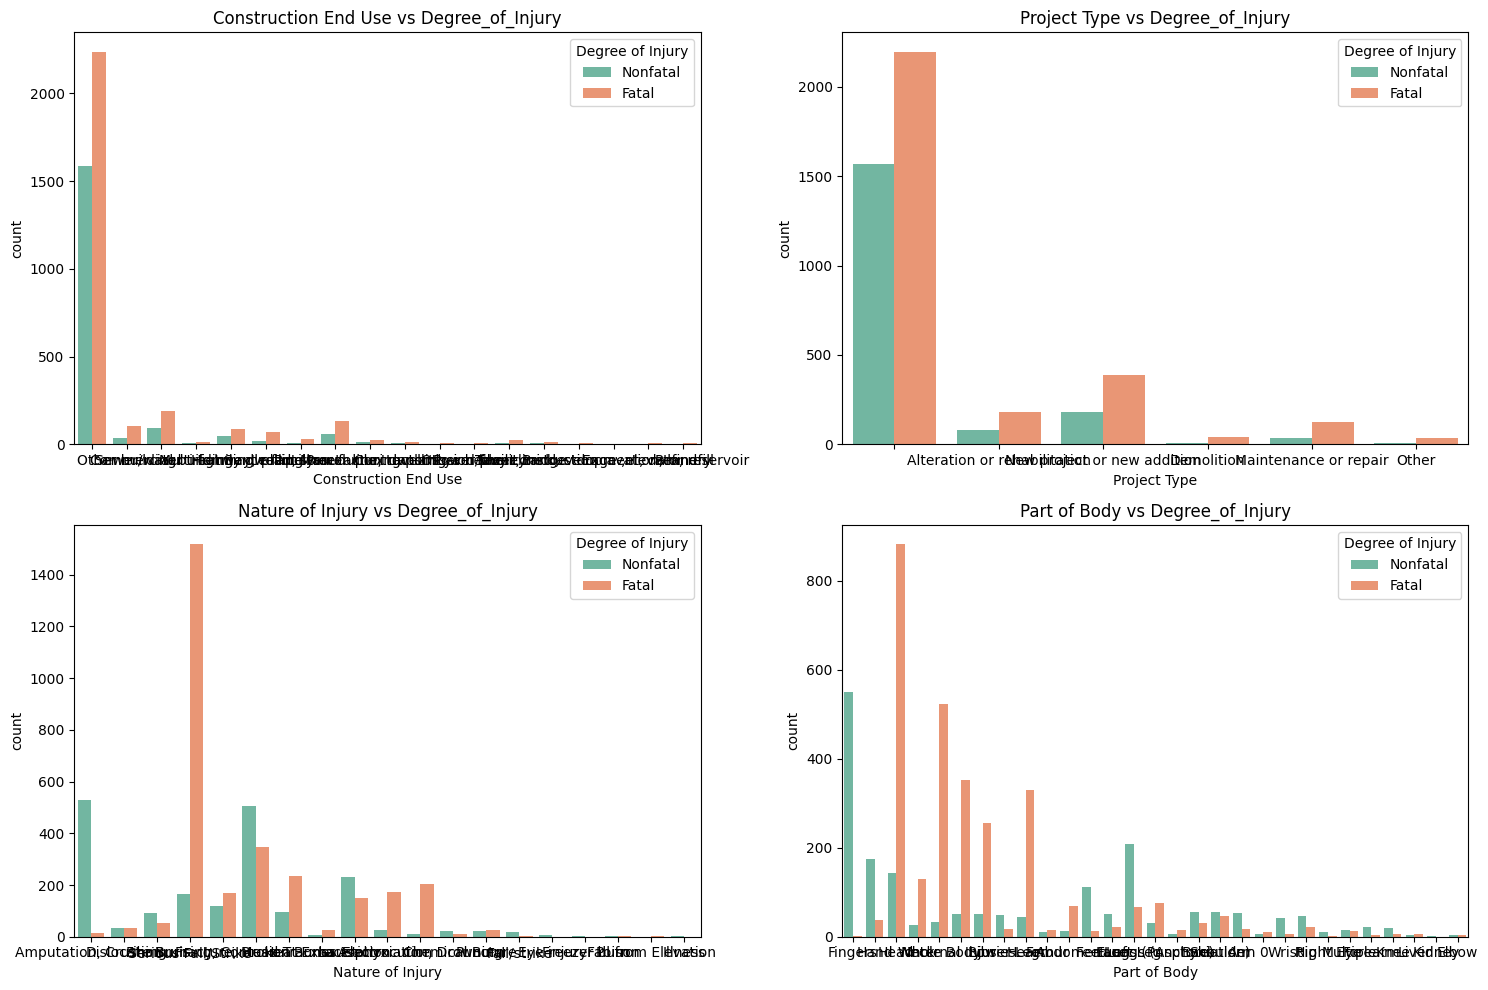

In [ ]:
# Countplot for categorical features against the target variable
categorical_cols = ['Construction End Use', 'Project Type','Nature of Injury', 'Part of Body']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], hue=df['Degree of Injury'], palette='Set2')
    plt.title(f'{col} vs Degree_of_Injury')
plt.tight_layout()
plt.show()

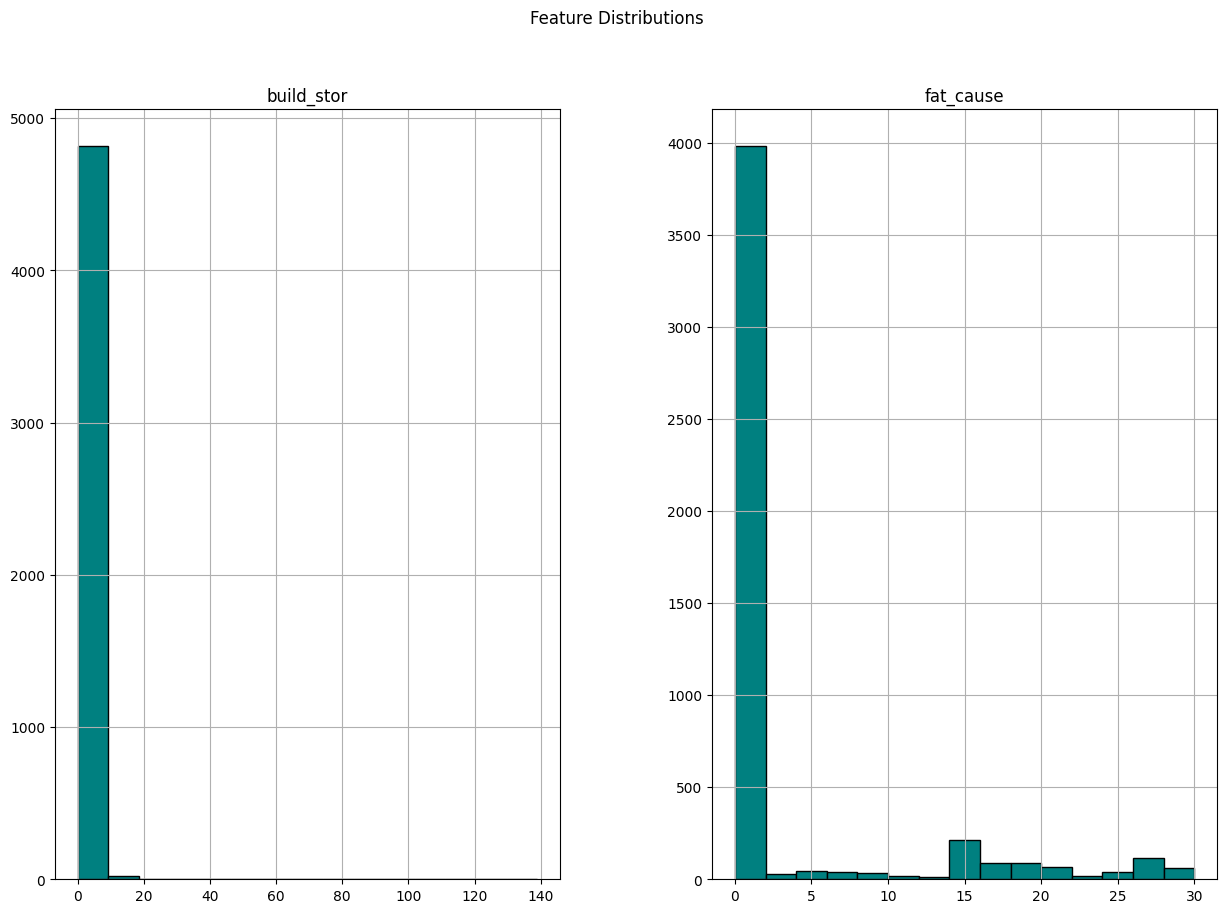

In [ ]:
# Plot histograms for all numeric columns
df.hist(bins=15, figsize=(15, 10), color="teal", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


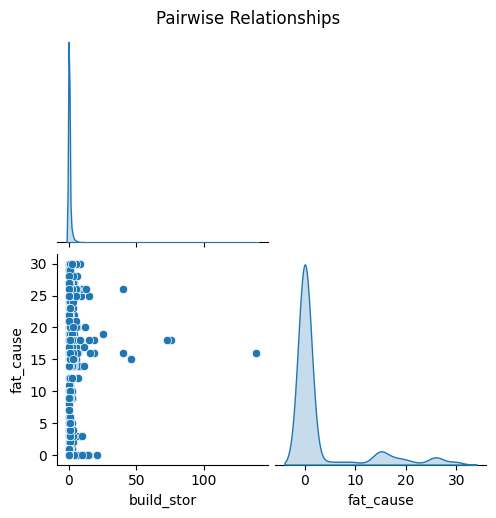

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


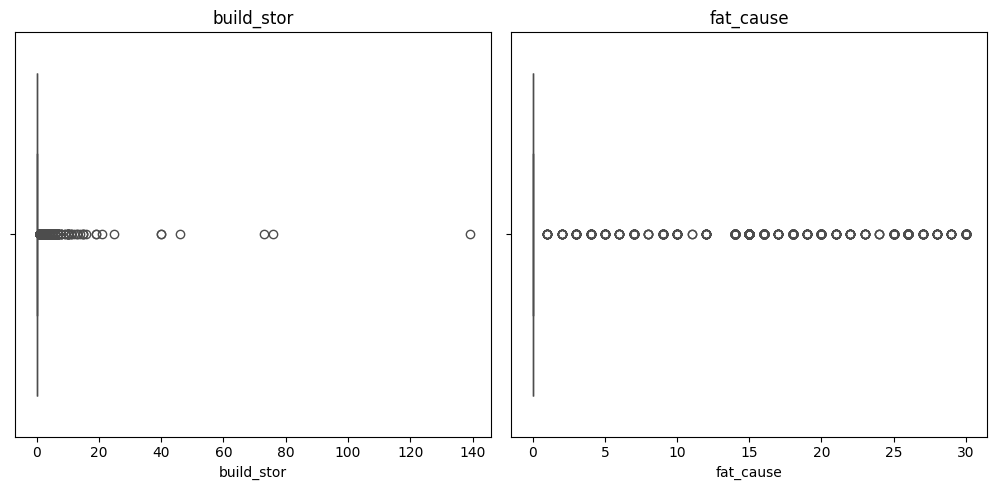

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of features to plot (numerical columns)
num_features = len(numerical_cols)

# Calculate number of rows and columns dynamically based on the number of numerical features
n_cols = 4  # Set number of columns for the subplot grid
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  # Dynamic row count

# Create subplots with dynamic size
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="orange")  # Add 'x=' to ensure boxplot is drawn correctly
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Event Date', 'Construction End Use', 'build_stor', 'Project Cost',
       'Project Type', 'Degree of Injury', 'Nature of Injury', 'Part of Body',
       'Event type', 'Environmental Factor', 'Human Factor', 'Task Assigned',
       'fat_cause'],
      dtype='object')

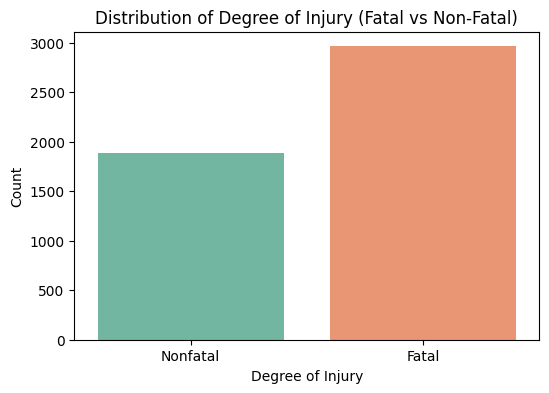

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable (Degree of Injury)
plt.figure(figsize=(6, 4))
sns.countplot(x='Degree of Injury', data=df, palette='Set2')
plt.title('Distribution of Degree of Injury (Fatal vs Non-Fatal)')
plt.xlabel('Degree of Injury')
plt.ylabel('Count')
plt.show()


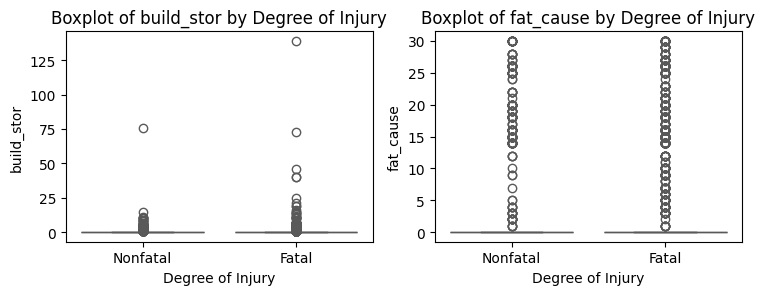

In [ ]:
# Boxplot for numerical features grouped by Degree_of_Injury (target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot dimensions based on the number of features
    sns.boxplot(x='Degree of Injury', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col} by Degree of Injury')

plt.tight_layout()
plt.show()


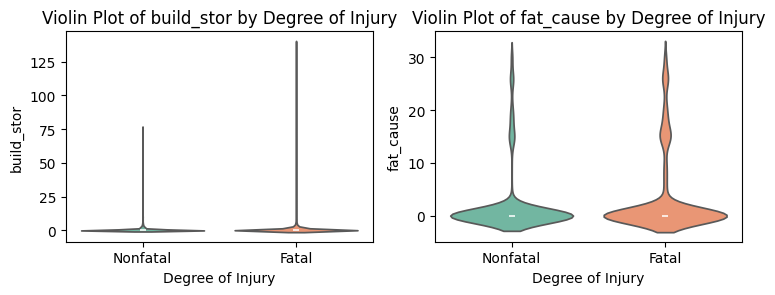

In [ ]:
# Violin plot for numerical features grouped by Degree_of_Injury
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot dimensions based on the number of features
    sns.violinplot(x='Degree of Injury', y=col, data=df, palette='Set2')
    plt.title(f'Violin Plot of {col} by Degree of Injury')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Event Date', 'Construction End Use', 'build_stor', 'Project Cost',
       'Project Type', 'Degree of Injury', 'Nature of Injury', 'Part of Body',
       'Event type', 'Environmental Factor', 'Human Factor', 'Task Assigned',
       'fat_cause'],
      dtype='object')

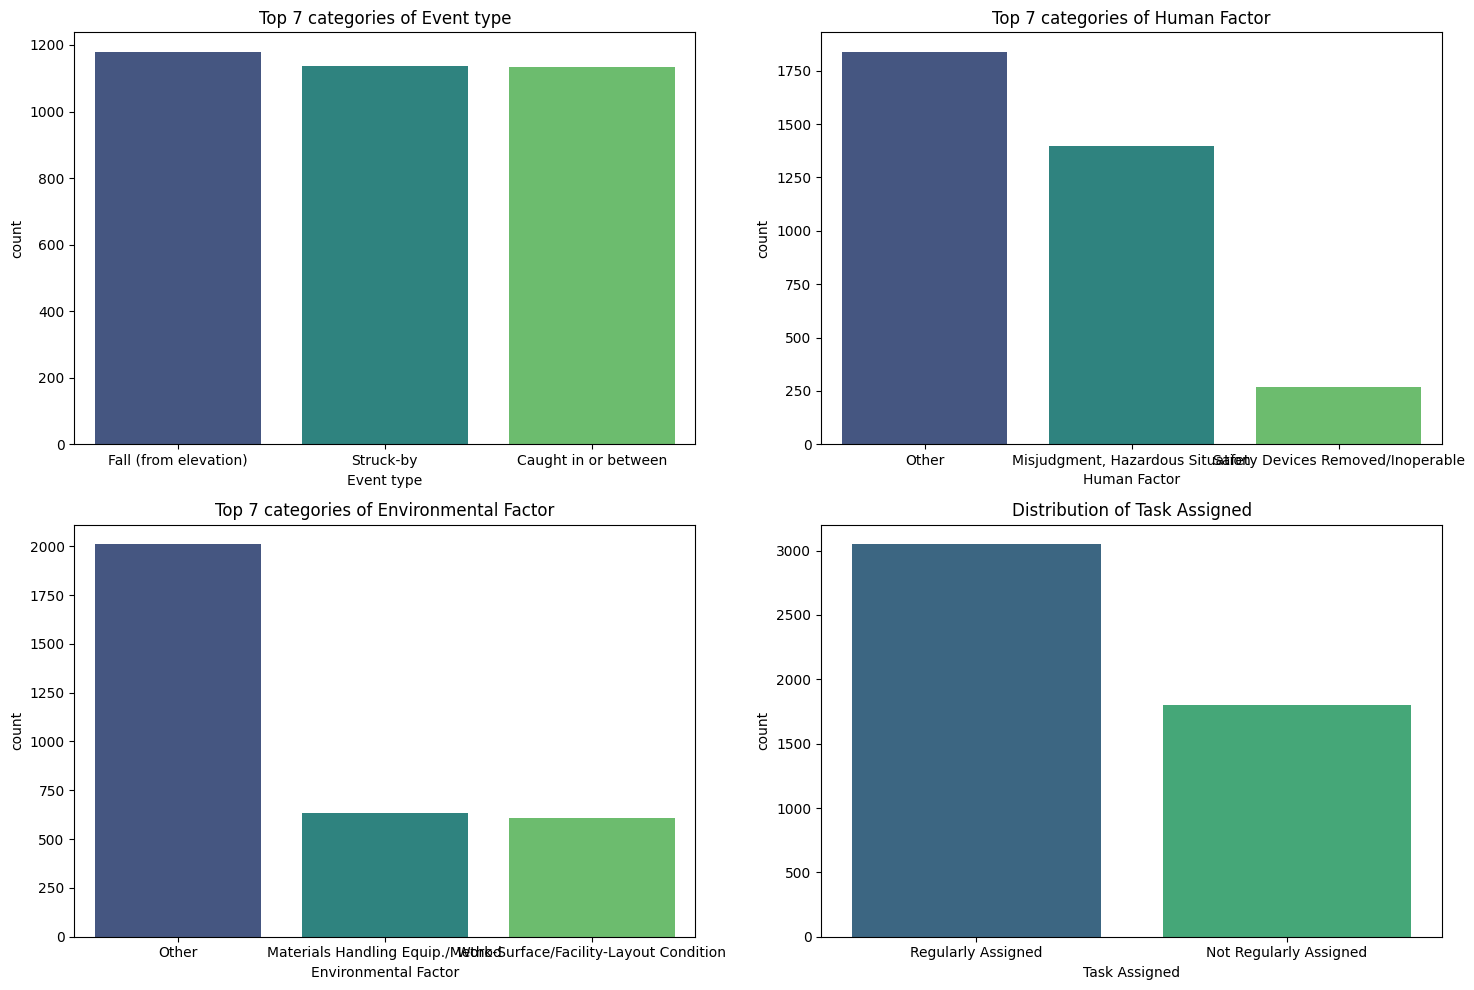

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = ['Event type', 'Human Factor', 'Environmental Factor', 'Task Assigned']

# Set up the plot figure
plt.figure(figsize=(15, 10))

# Loop through each categorical column and plot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)

    # Check if the column has more than 7 categories
    if df[col].nunique() > 3:
        # Display only top 7 categories based on frequency
        top_categories = df[col].value_counts().nlargest(3).index
        sns.countplot(x=df[col], palette='viridis', order=top_categories)
        plt.title(f'Top 7 categories of {col}')
    else:
        # Display all categories if they are less than or equal to 7
        sns.countplot(x=df[col], palette='viridis')
        plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


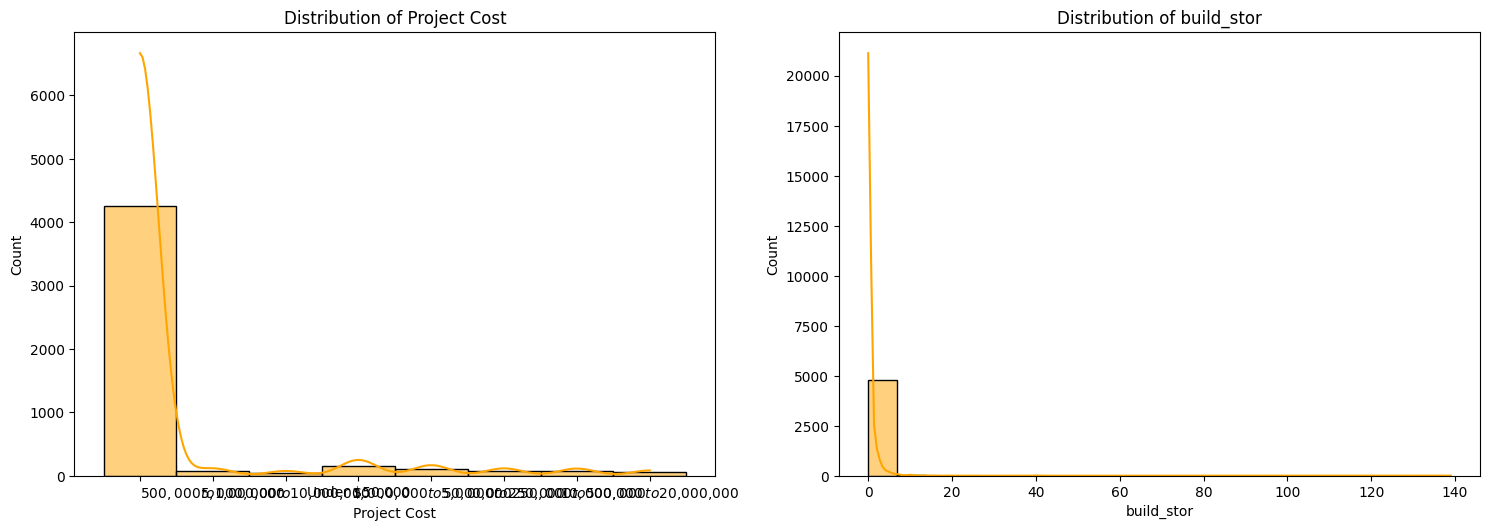

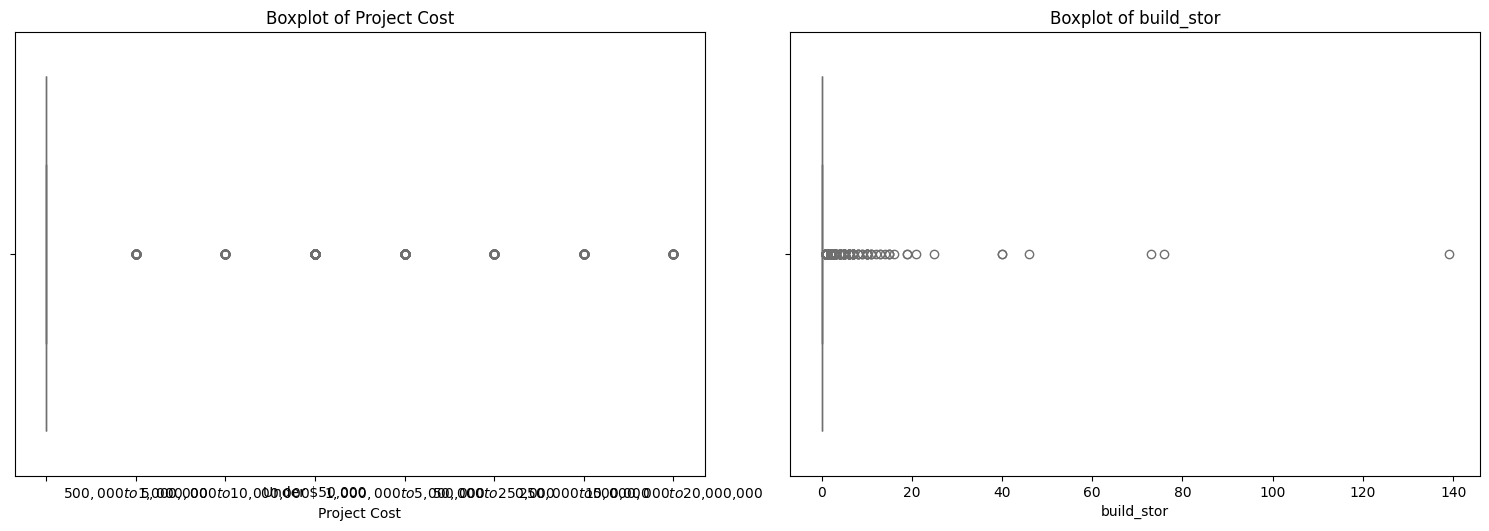

In [ ]:
# Plot distribution of numerical features
numerical_cols = [ 'Project Cost', 'build_stor']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='orange', bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplot for numerical features to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


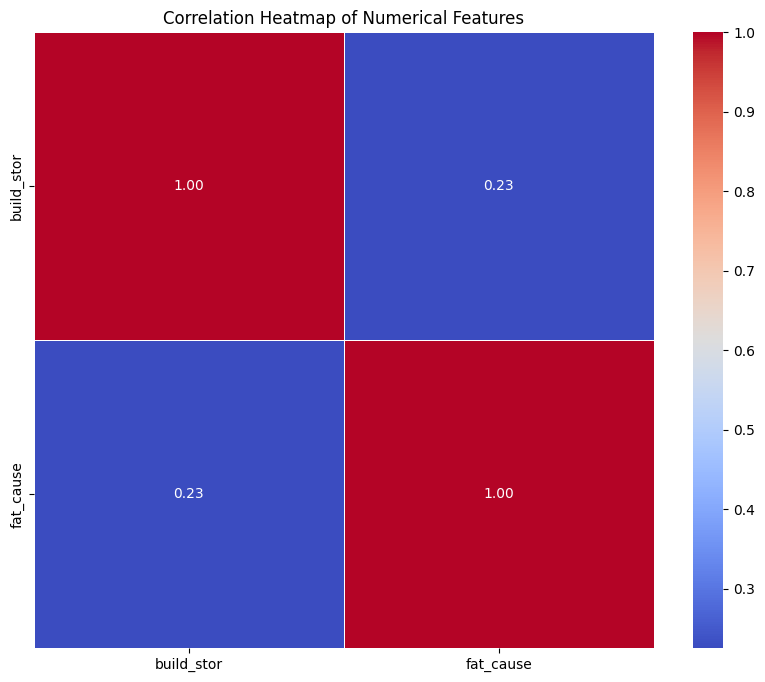

In [ ]:
# Compute the correlation matrix only for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Handle Date columns (convert 'Event Date' to timestamp or extract components)
df['Event_Date'] = pd.to_datetime(df['Event Date'], errors='coerce')  # Coerce invalid dates to NaT
df['Event_Year'] = df['Event_Date'].dt.year
df['Event_Month'] = df['Event_Date'].dt.month


# Drop the original Event Date column after extracting relevant components
df.drop('Event Date', axis=1, inplace=True)
df.drop('Event_Date', axis=1, inplace=True)
df.head()

,Construction End Use,build_stor,Project Cost,Project Type,Degree of Injury,Nature of Injury,Part of Body,Event type,Environmental Factor,Human Factor,Task Assigned,fat_cause,Event_Year,Event_Month
0,,0,,,Nonfatal,"Amputation, Crushing",Fingers,Caught in or between,Catch Point/Puncture Action,Other,Regularly Assigned,0,2017,8
1,Other building,1,,Alteration or rehabilitation,Nonfatal,Dislocation,Fingers,Caught in or between,Other,Position Inappropriate For Task,Regularly Assigned,0,2017,7
2,,0,,,Nonfatal,Fire Burn,Hand,Other,Other,Malfunction In Securing/Warning Op,Not Regularly Assigned,0,2017,6
3,Commercial building,1,"$500,000 to $1,000,000",Alteration or rehabilitation,Fatal,Serious Fall/Strike,Head,Fall (from elevation),Work-Surface/Facility-Layout Condition,Other,Regularly Assigned,15,2017,6
4,,0,,,Nonfatal,"Bruising, Contusion",Neck,Struck-by,Overhead Moving/Falling Object Action,Insufficient/Lack/Housekeeping Program,Regularly Assigned,0,2017,6


In [ ]:
cost_mapping = {
    'Under $50,000': 1,
    '$50,000 to $250,000': 2,
    '$250,000 to $500,000': 3,
    '$500,000 to $1,000,000': 4,
    '$1,000,000 to $5,000,000': 5,
    '$5,000,000 to $10,000,000': 6,
    '$10,000,000 to $20,000,000': 7,

}
# Replace blanks and missing values with '0'
df['Project Cost'] = df['Project Cost'].replace(['', None], '0')

# Apply the mapping and set '0' for blanks explicitly
df['Project Cost'] = df['Project Cost'].map(lambda x: cost_mapping.get(x, 0))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
df['Degree of Injury'] = label_encoder.fit_transform(df['Degree of Injury'])
df.head()

,Construction End Use,build_stor,Project Cost,Project Type,Degree of Injury,Nature of Injury,Part of Body,Event type,Environmental Factor,Human Factor,Task Assigned,fat_cause,Event_Year,Event_Month
0,,0,0,,1,"Amputation, Crushing",Fingers,Caught in or between,Catch Point/Puncture Action,Other,Regularly Assigned,0,2017,8
1,Other building,1,0,Alteration or rehabilitation,1,Dislocation,Fingers,Caught in or between,Other,Position Inappropriate For Task,Regularly Assigned,0,2017,7
2,,0,0,,1,Fire Burn,Hand,Other,Other,Malfunction In Securing/Warning Op,Not Regularly Assigned,0,2017,6
3,Commercial building,1,4,Alteration or rehabilitation,0,Serious Fall/Strike,Head,Fall (from elevation),Work-Surface/Facility-Layout Condition,Other,Regularly Assigned,15,2017,6
4,,0,0,,1,"Bruising, Contusion",Neck,Struck-by,Overhead Moving/Falling Object Action,Insufficient/Lack/Housekeeping Program,Regularly Assigned,0,2017,6


In [ ]:
categorical_cols = ['Construction End Use', 'Project Type','Nature of Injury', 'Part of Body', 'Event type', 'Environmental Factor', 'Human Factor', 'Task Assigned']
# One-Hot Encoding for nominal features
df_one_hot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Frequency Encoding for nominal features
df_freq = df.copy()
for col in categorical_cols:
    df_freq[col] = df_freq[col].map(df_freq[col].value_counts())

In [ ]:
# Splitting the data
target_col = 'Degree of Injury'
X_one_hot = df_one_hot.drop(columns=[target_col])
X_freq = df_freq.drop(columns=[target_col])
y = df[target_col]

X_one_hot_train, X_one_hot_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)
X_freq_train, X_freq_test, _, _ = train_test_split(X_freq, y, test_size=0.2, random_state=42)

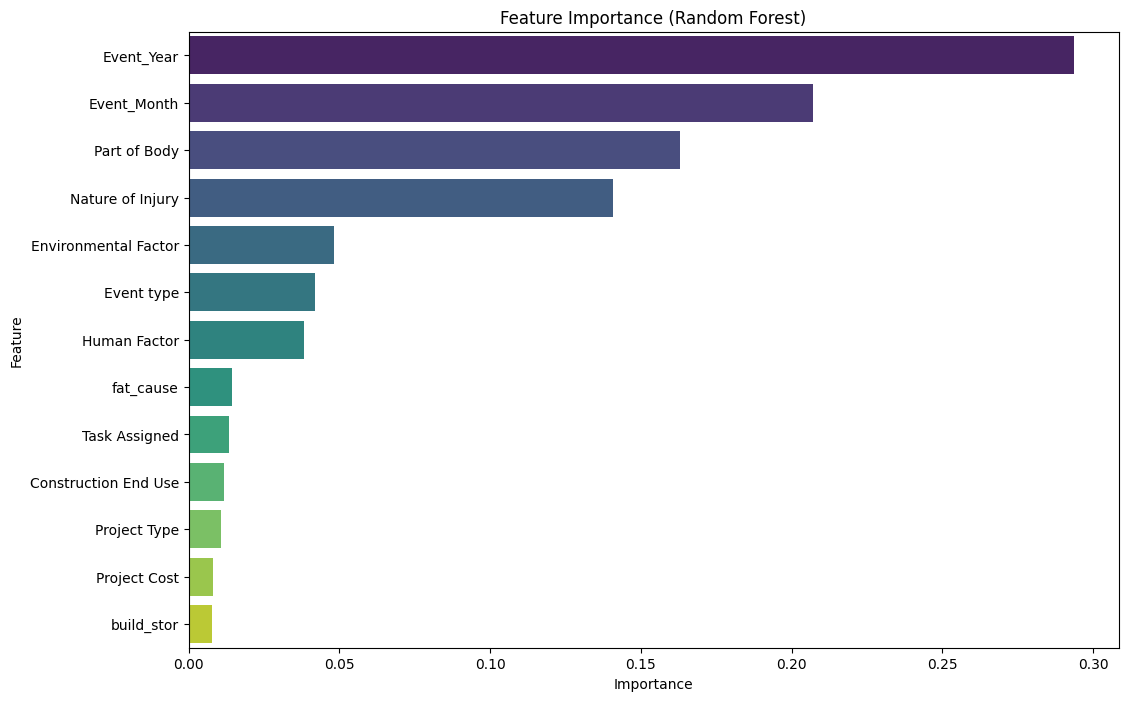

                 Feature  Importance
11            Event_Year    0.293752
12           Event_Month    0.207110
5           Part of Body    0.163123
4       Nature of Injury    0.140942
7   Environmental Factor    0.048399


In [ ]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas explicitly
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
df1=df_freq.copy()
X= df1.drop(columns=['Degree of Injury'],axis=1)
y=df1['Degree of Injury']


# Fit the model on the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

# Display top features
print(importance_df.head())

# Models


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
# Standardize the data
scaler = StandardScaler()
X_one_hot_train_scaled = scaler.fit_transform(X_one_hot_train)
X_one_hot_test_scaled = scaler.transform(X_one_hot_test)

# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_one_hot_train_scaled, y_train)

# Evaluate
y_pred = logistic_model.predict(X_one_hot_test_scaled)
y_pred_1=y_pred
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       587
           1       0.85      0.86      0.86       383

    accuracy                           0.89       970
   macro avg       0.88      0.88      0.88       970
weighted avg       0.89      0.89      0.89       970



## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_freq_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_freq_test)
y_pred_2=y_pred
print("Random Forest Results:")
print(classification_report(y_test, y_pred))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       587
           1       0.88      0.87      0.88       383

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970



## Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_freq_train, y_train)

# Evaluate
y_pred = dt_model.predict(X_freq_test)
y_pred_3=y_pred
print("Decision Tree Results:")
print(classification_report(y_test, y_pred))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       587
           1       0.85      0.85      0.85       383

    accuracy                           0.88       970
   macro avg       0.88      0.88      0.88       970
weighted avg       0.88      0.88      0.88       970



## SVM classifier

In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_one_hot_train_scaled, y_train)

# Evaluate
y_pred = svm_model.predict(X_one_hot_test_scaled)
y_pred_4=y_pred
print("SVM Results:")
print(classification_report(y_test, y_pred))


SVM Results:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       587
           1       0.87      0.84      0.85       383

    accuracy                           0.89       970
   macro avg       0.88      0.88      0.88       970
weighted avg       0.89      0.89      0.89       970



## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_one_hot_train_scaled, y_train)

# Evaluate
y_pred = knn_model.predict(X_one_hot_test_scaled)
y_pred_5=y_pred
print("KNN Results:")
print(classification_report(y_test, y_pred))


KNN Results:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       587
           1       0.83      0.72      0.77       383

    accuracy                           0.83       970
   macro avg       0.83      0.81      0.82       970
weighted avg       0.83      0.83      0.83       970



## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = nb_model.predict(X_one_hot_test)
y_pred_6=y_pred
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       587
           1       0.84      0.73      0.78       383

    accuracy                           0.84       970
   macro avg       0.84      0.82      0.83       970
weighted avg       0.84      0.84      0.84       970



## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_freq_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_freq_test)
y_pred_7=y_pred
print("XGBoost Results:")
print(classification_report(y_test, y_pred))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       587
           1       0.89      0.90      0.89       383

    accuracy                           0.92       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.92      0.92      0.92       970



## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_freq_train, y_train)

# Evaluate
y_pred = lgb_model.predict(X_freq_test)
y_pred_8=y_pred
print("LightGBM Results:")
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1500, number of negative: 2377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 3877, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386897 -> initscore=-0.460374
[LightGBM] [Info] Start training from score -0.460374
LightGBM Results:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       587
           1       0.89      0.90      0.89       383

    accuracy                           0.92       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.92      0.92      0.92       970



## CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier

# Train CatBoost
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_freq_train, y_train)

# Evaluate
y_pred = cat_model.predict(X_freq_test)
y_pred_9=y_pred
print("CatBoost Results:")
print(classification_report(y_test, y_pred))


CatBoost Results:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       587
           1       0.89      0.89      0.89       383

    accuracy                           0.92       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.92      0.92      0.92       970



## Neural Networks classifier

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
X_one_hot_train_scaled = scaler.fit_transform(X_one_hot_train)
X_one_hot_test_scaled = scaler.transform(X_one_hot_test)

# Build Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_one_hot_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
nn_model.fit(X_one_hot_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate
y_pred = (nn_model.predict(X_one_hot_test_scaled) > 0.5).astype("int32")
y_pred_10=y_pred
print("Neural Network Results:")
print(classification_report(y_test, y_pred))


Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7505 - loss: 0.5521
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2356
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9335 - loss: 0.1823
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1626
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.1344
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1413
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1283
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1047
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.0991
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.0915
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0863
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

##  Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Train Ridge Classifier
ridge_model = RidgeClassifier(random_state=42)
ridge_model.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = ridge_model.predict(X_one_hot_test)
print("Ridge Classifier Results:")
print(classification_report(y_test, y_pred))


Ridge Classifier Results:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       587
           1       0.88      0.82      0.85       383

    accuracy                           0.89       970
   macro avg       0.89      0.87      0.88       970
weighted avg       0.89      0.89      0.89       970



##Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Train QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = qda_model.predict(X_one_hot_test)
print("QDA Results:")
print(classification_report(y_test, y_pred))


QDA Results:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       587
           1       0.88      0.54      0.67       383

    accuracy                           0.79       970
   macro avg       0.82      0.74      0.75       970
weighted avg       0.81      0.79      0.77       970



##SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

# Train SGDClassifier
# Changed loss parameter from 'log' to 'log_loss'
sgd_model = SGDClassifier(loss='log_loss', random_state=42)
sgd_model.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = sgd_model.predict(X_one_hot_test)
print("SGD Classifier Results:")
print(classification_report(y_test, y_pred))

SGD Classifier Results:
              precision    recall  f1-score   support

           0       0.92      0.02      0.04       587
           1       0.40      1.00      0.57       383

    accuracy                           0.41       970
   macro avg       0.66      0.51      0.30       970
weighted avg       0.71      0.41      0.25       970



Logistic Regression (L2)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression with L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', random_state=42)
log_reg_l2.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = log_reg_l2.predict(X_one_hot_test)
print("Logistic Regression (L2) Results:")
print(classification_report(y_test, y_pred))


Logistic Regression (L2) Results:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       587
           1       0.86      0.78      0.82       383

    accuracy                           0.86       970
   macro avg       0.86      0.85      0.86       970
weighted avg       0.86      0.86      0.86       970



##Logistic Regression (L1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression with L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = log_reg_l1.predict(X_one_hot_test)
print("Logistic Regression (L1) Results:")
print(classification_report(y_test, y_pred))


Logistic Regression (L1) Results:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       587
           1       0.88      0.80      0.84       383

    accuracy                           0.88       970
   macro avg       0.88      0.86      0.87       970
weighted avg       0.88      0.88      0.88       970



##Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_one_hot_train, y_train)

# Evaluate
y_pred = gnb_model.predict(X_one_hot_test)

print("Gaussian Naive Bayes Results:")
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       587
           1       0.84      0.73      0.78       383

    accuracy                           0.84       970
   macro avg       0.84      0.82      0.83       970
weighted avg       0.84      0.84      0.84       970



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score

# Assuming the following models and predictions are already available:
# model_1, model_2, ..., model_n: Trained models
# X_test, y_test: Test data features and target labels
# y_pred_1, y_pred_2, ..., y_pred_n: Predictions for each model


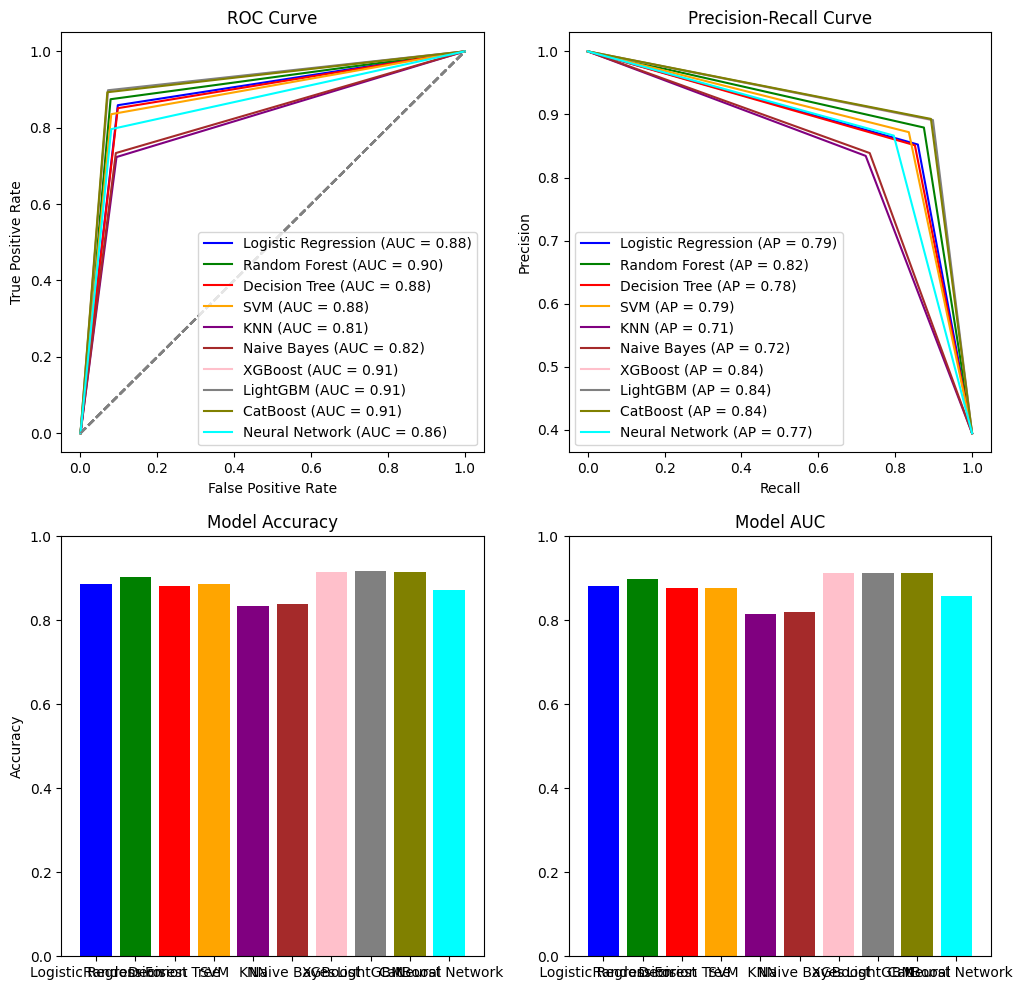

In [ ]:
# Prepare the plot
plt.figure(figsize=(12, 12))

# List of models and their predictions (update with your models and predictions)
# models = [model_1, model_2, model_3, model_4]  # List of models
# predictions = [y_pred_1, y_pred_2, y_pred_3, y_pred_4]  # List of model predictions
models=[logistic_model,rf_model,dt_model,svm_model,knn_model,nb_model,xgb_model,lgb_model,cat_model,nn_model]
predictions=[y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9,y_pred_10]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN',
               'Naive Bayes', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network']
# Colors for plotting - extended to match the number of models
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Loop through each model to compute the metrics and plot
for i, (model, pred) in enumerate(zip(models, predictions)):

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve and Average Precision (AP)
    precision, recall, _ = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)

    # Accuracy of the model
    accuracy = accuracy_score(y_test, pred)

    # Plot ROC Curve
    plt.subplot(2, 2, 1)  # 2x2 grid, plot in the first subplot
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot PR Curve
    plt.subplot(2, 2, 2)  # Plot in the second subplot
    plt.plot(recall, precision, color=colors[i], label=f'{model_names[i]} (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    # Plot Accuracy
    plt.subplot(2, 2, 3)  # Plot in the third subplot
    plt.bar(f'{model_names[i]}', accuracy, color=colors[i])
    plt.ylim(0, 1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')

    # Plot AUC Score
    plt.subplot(2, 2, 4)  # Plot in the fourth subplot
    plt.bar(f' {model_names[i]}', roc_auc, color=colors[i])
    plt.ylim(0, 1)
    plt.title('Model AUC')

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI, RateLimitError, AuthenticationError

# Initialize OpenAI client with your key
client = OpenAI(api_key='your_API_key')

def generate_safety_report(event_type, fall_height, human_factor, environmental_factor, task_assigned, prediction):
    prompt = (
        f"Accident Prediction Report:\n"
        f"- Event Type: {event_type}\n"
        f"- Fall Height: {fall_height} meters\n"
        f"- Human Factor: {human_factor}\n"
        f"- Environmental Factor: {environmental_factor}\n"
        f"- Task Assigned: {task_assigned}\n"
        f"- Prediction: {'Fatal' if prediction == 1 else 'Non-Fatal'}\n\n"
        f"Generate a detailed safety analysis and suggestions for preventing such accidents in the future."
    )
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a construction safety expert."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=150,
            temperature=0.7
        )
        return response.choices[0].message.content
    except (RateLimitError, AuthenticationError) as e:
        print(f"OpenAI Error: {str(e)} -- Switching to mock report.")
        return generate_mock_safety_report(event_type, fall_height, human_factor, environmental_factor, task_assigned, prediction)

# Mock fallback function
def generate_mock_safety_report(event_type, fall_height, human_factor, environmental_factor, task_assigned, prediction):
    severity = "Fatal" if prediction == 1 else "Non-Fatal"
    report = f"""
    [Mock Report]
    Accident Prediction Report:
    - Event Type: {event_type}
    - Fall Height: {fall_height} meters
    - Human Factor: {human_factor}
    - Environmental Factor: {environmental_factor}
    - Task Assigned: {task_assigned}
    - Prediction: {severity}

    Key risks involve {human_factor.lower()} during {task_assigned.lower()} under {environmental_factor.lower()} conditions.
    Suggested actions: Improve {task_assigned.lower()} safety, monitor for {human_factor.lower()}, and mitigate {environmental_factor.lower()} hazards.
    """
    return report



In [ ]:
# Example usage of the updated function
example_report = generate_safety_report(
    event_type="Fall from height",
    fall_height=5,
    human_factor="Inattention",
    environmental_factor="Rainy",
    task_assigned="Roofing",
    prediction=1
)

print("Generated Safety Report:\n")
print(example_report)


OpenAI Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}} -- Switching to mock report.
Generated Safety Report:


    [Mock Report]
    Accident Prediction Report:
    - Event Type: Fall from height
    - Fall Height: 5 meters
    - Human Factor: Inattention
    - Environmental Factor: Rainy
    - Task Assigned: Roofing
    - Prediction: Fatal

    Key risks involve inattention during roofing under rainy conditions.
    Suggested actions: Improve roofing safety, monitor for inattention, and mitigate rainy hazards.
    
